(a) To begin, load in the Boston data set, which is part of the ISLP
library.

In [1]:
import pandas as pd
from ISLP import load_data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

Boston = load_data('Boston')

In [6]:

Boston.to_csv('Boston.csv', index=False) 

In [7]:
Boston = pd.read_csv('Boston.csv')

(b) How many rows are in this data set? How many columns? What do the rows and columns represent?
    There are 506 rows and 13 columns, representing 506 data points and 13 variables, respectively.

In [8]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


- 'crim': Per capita crime rate by town.（城鎮人均犯罪率）
- 'zn': Proportion of residential land zoned for lots over 25,000 sq.ft.（住宅用地超過 25,000 平方英尺的比例）
- 'indus': Proportion of non-retail business acres per town.（城鎮非零售商業用地的比例）
- 'chas': Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).（查爾斯河虛擬變數，如果區域接壤河流則為 1，否則為 0）
- 'nox': Nitrogen oxides concentration (parts per 10 million).（氮氧化物濃度，百萬分之幾）
- 'rm': Average number of rooms per dwelling.（每個住宅的平均房間數）
- 'age': Proportion of owner-occupied units built prior to 1940.（1940 年之前建造的自有住宅比例）
- 'dis': Weighted distances to five Boston employment centres.（到波士頓五個就業中心的加權距離）
- 'rad': Index of accessibility to radial highways.（徑向高速公路可達性指數）
- 'tax': Full-value property-tax rate per $10,000.（每 10,000 美元的完全價值財產稅率）
- 'ptratio': Pupil-teacher ratio by town.（城鎮學生與教師比例）
- 'lstat': Percentage of lower status of the population.（人口中弱勢群體的百分比）
- 'medv': Median value of owner-occupied homes in $1000's.（自有住宅的中位數價值，單位為千美元）

(c) 製作此資料集中各預測變數（欄位）的成對散佈圖，並描述你的發現。

- 平均每戶房間數（rm）與自有住宅中位數價值（medv）呈現明顯正相關，房間數越多，房價通常越高。
- 人口中弱勢群體百分比（lstat）與自有住宅中位數價值（medv）呈現明顯負相關，弱勢比例越高，房價通常越低。
- 其他變數間也存在不同程度的線性或非線性關係，部分變數如犯罪率（crim）與財產稅（tax）、徑向高速公路可達性指數（rad）也有較強的相關性。

這些關係有助於理解影響波士頓房價的主要因素，但僅能說明統計上的關聯，並不代表因果關係。

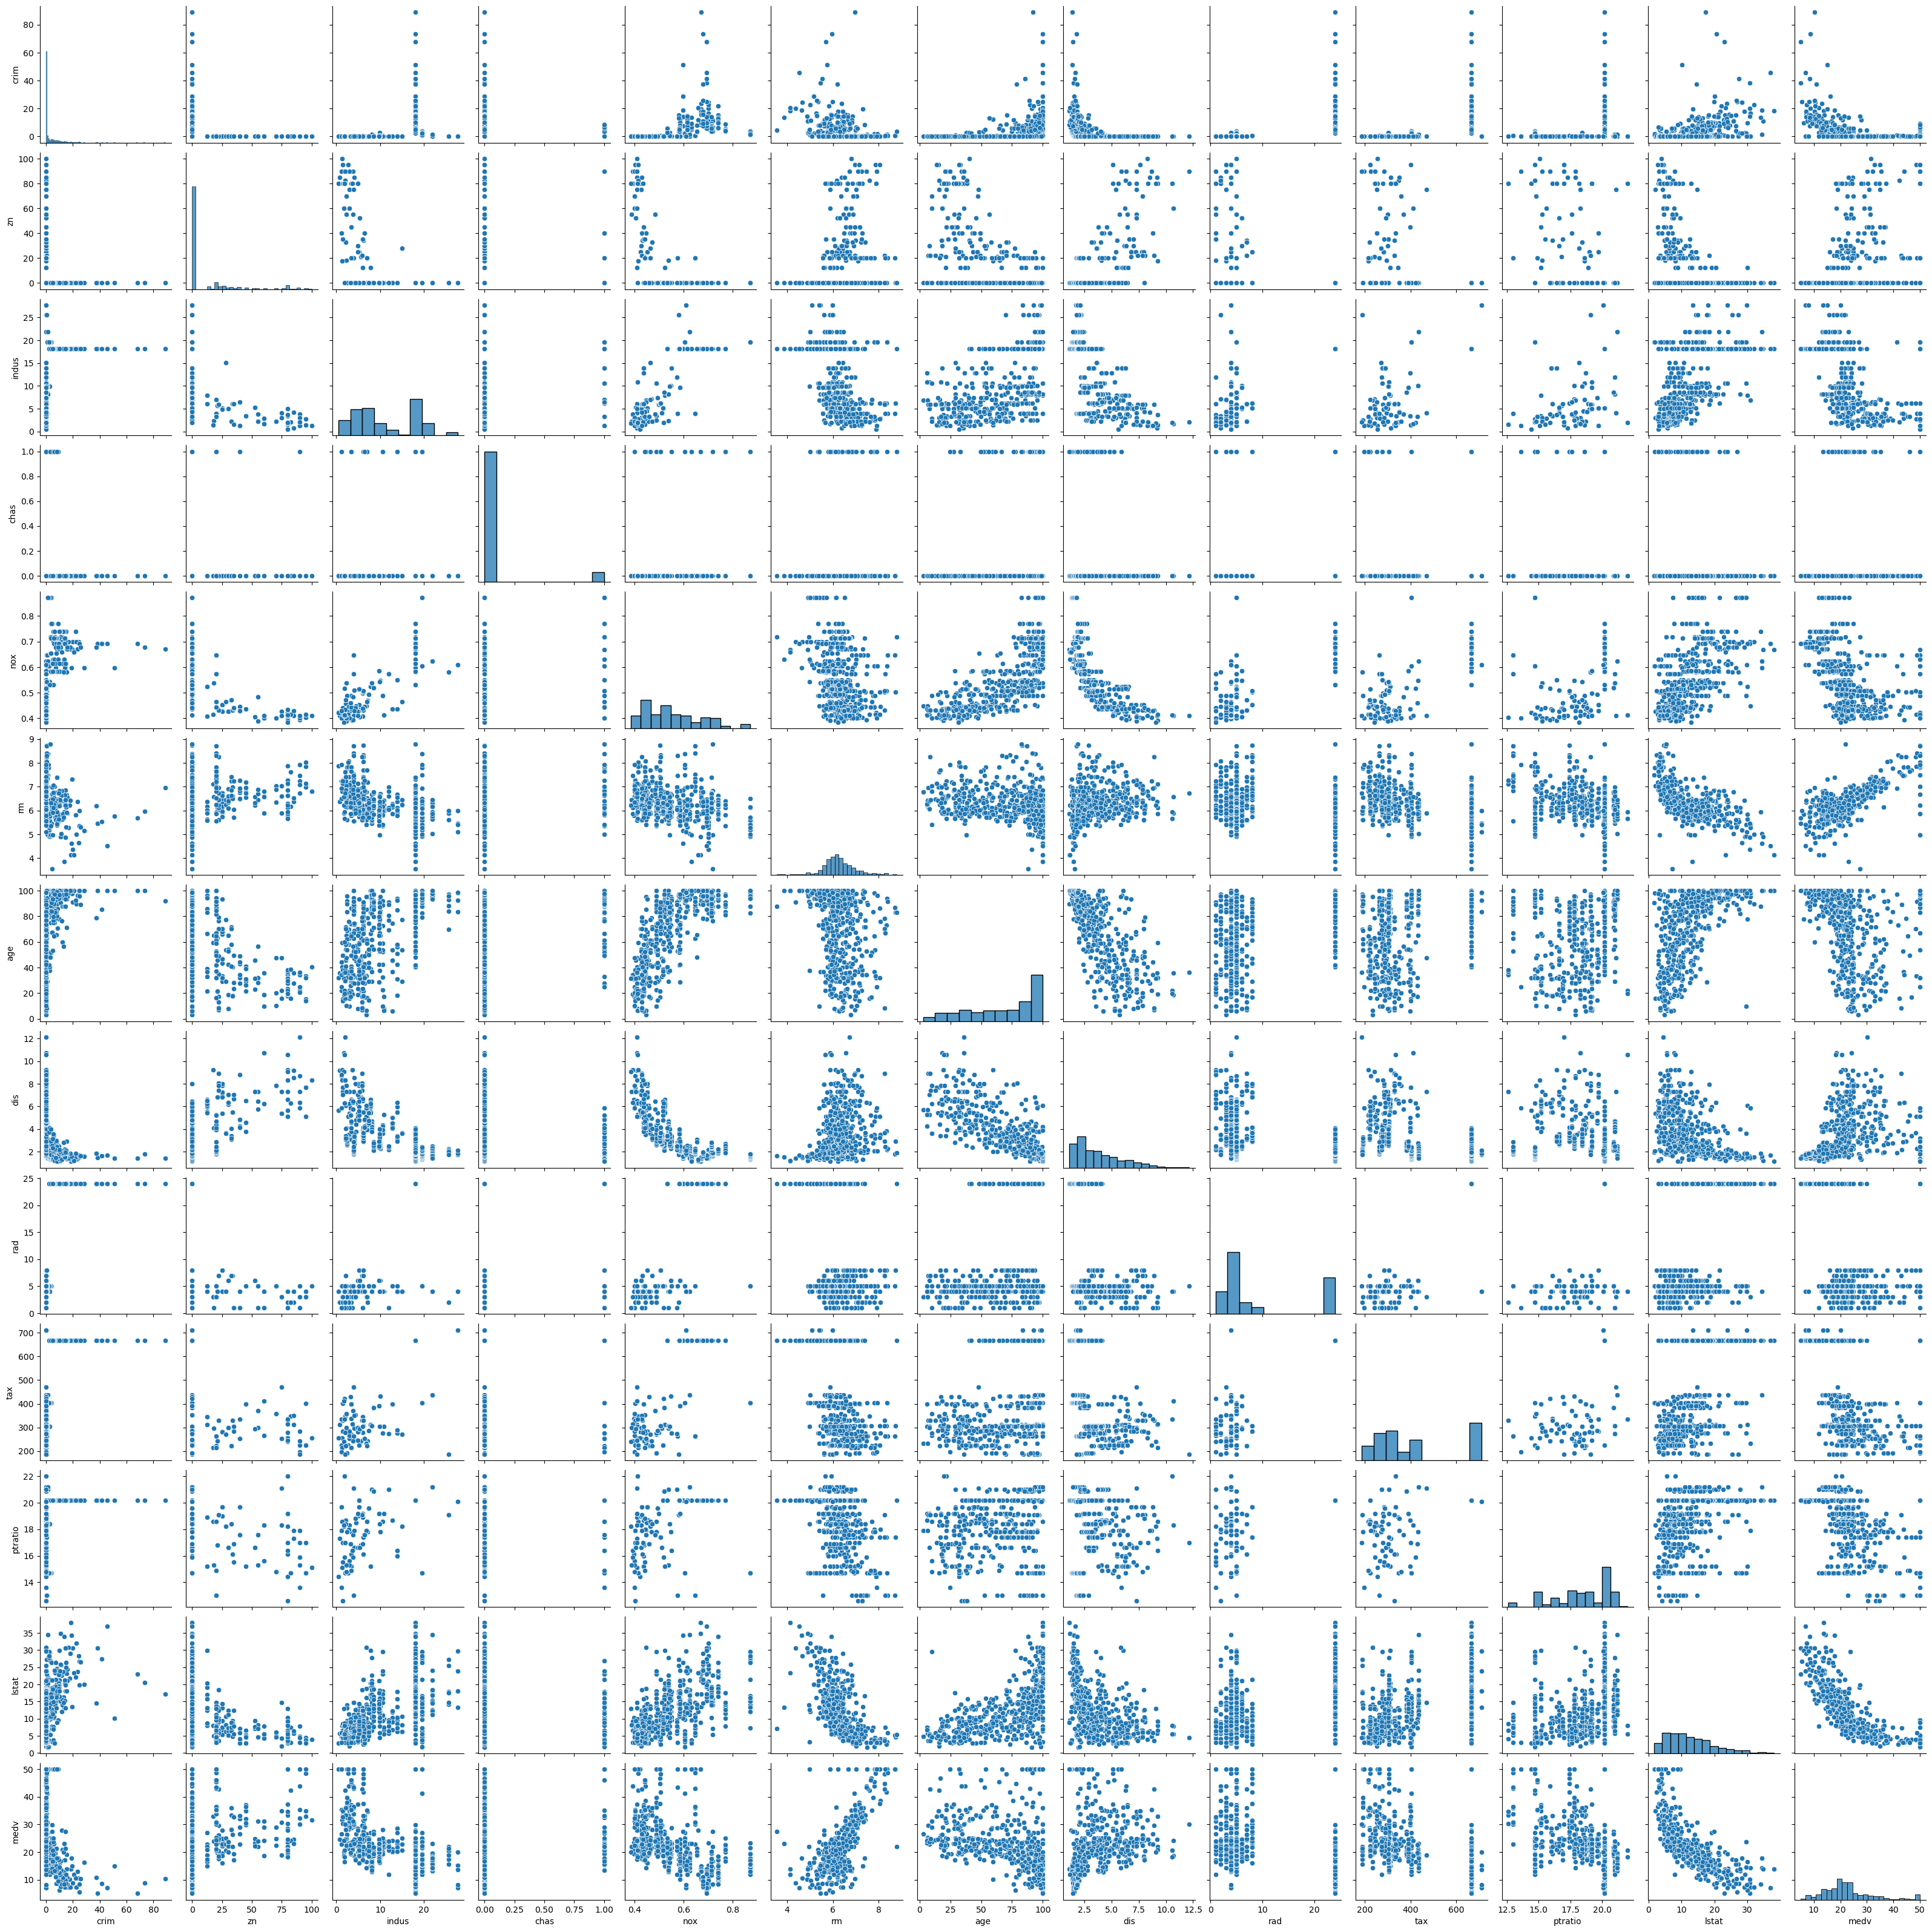

In [9]:

sns.pairplot(Boston)

(d) 是否有任何預測變數與人均犯罪率（crim）有關聯？請說明其關係。

根據相關係數分析，與人均犯罪率（crim）絕對值大於 0.5 的變數如下：

- 徑向高速公路可達性指數（rad）：相關係數 0.63，顯示與犯罪率有明顯正相關。
- 財產稅（tax）：相關係數 0.58，也與犯罪率呈現正相關。

這代表 rad 與 tax 這兩個變數與犯罪率有較強的線性關聯。其他變數雖然也有一定相關性，但強度較弱。

請注意，相關性僅代表統計上的關聯，並不代表因果關係。這些結果僅顯示這些變數與犯罪率之間存在統計上的聯繫，無法證明其中一個變數會導致另一個變數的變化。

In [10]:

correlations = Boston.corr()['crim'].sort_values(ascending=False)
print("Correlations with per capita crime rate (crim):")
print(correlations)


strong_associations = correlations[abs(correlations) > 0.5]
print("\nPotentially strong associations (absolute correlation > 0.5):")
print(strong_associations)

Correlations with per capita crime rate (crim):
crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64

Potentially strong associations (absolute correlation > 0.5):
crim    1.000000
rad     0.625505
tax     0.582764
Name: crim, dtype: float64


(e) 波士頓郊區中，是否有特別高的犯罪率、財產稅或師生比？請評論各預測變數的範圍。

1. 高犯罪率郊區（超過90百分位）：
- 這些區域的犯罪率平均高達22，顯著高於整體平均。
- 住宅用地比例（zn）接近零，顯示住宅用地較小、商業用地較多。
- 工業化程度高（indus），氮氧化物濃度（nox）偏高（約0.67）。
- 房屋老舊（age約93%），但與房價（medv）未必直接相關。
- 距離就業中心較近（dis低），但未必帶來高財富。
- 財產稅（tax）多為666，屬於高稅區。
- 師生比（ptratio）偏低，學校資源有限，可能影響教育品質。

2. 高財產稅郊區（超過90百分位）：
- 這些區域多為高工業化、房屋老舊，總計137個郊區。
- 財產稅均為最高值666，稅負重，可能壓低房價。
- 這些區域的房價分布從低到高皆有。

3. 高師生比郊區（超過90百分位）：
- 共有56個郊區，這些區域學生人數多，師生比高。
- 高師生比與高犯罪率有一定關聯。
- 這些區域多為低房價、工業化程度高、污染嚴重、缺乏住宅分區規劃。

整體來看，犯罪率、財產稅與師生比高的郊區，往往伴隨工業化、老舊房屋、教育資源不足等問題，這些因素也反映在房價與居住品質上。

In [12]:

desc_stats = Boston[['crim', 'tax', 'ptratio']].describe()


print("Descriptive statistics for crim, tax, and ptratio:\n", desc_stats)


high_crim_threshold = Boston['crim'].quantile(0.90)
high_tax_threshold = Boston['tax'].quantile(0.90)
high_ptratio_threshold = Boston['ptratio'].quantile(0.90)

high_crim_suburbs = Boston[Boston['crim'] >= high_crim_threshold]
high_tax_suburbs = Boston[Boston['tax'] >= high_tax_threshold]
high_ptratio_suburbs = Boston[Boston['ptratio'] >= high_ptratio_threshold]


print("\nSuburbs with high crime rates (above 90th percentile):", high_crim_suburbs.index.tolist())
print(high_crim_suburbs.describe())

print("\nSuburbs with high tax rates (above 90th percentile):", high_tax_suburbs.index.tolist())
print(high_tax_suburbs.describe())

print("\nSuburbs with high pupil-teacher ratios (above 90th percentile):", high_ptratio_suburbs.index.tolist())
print(high_ptratio_suburbs.describe())


predictor_ranges = Boston[['crim', 'tax', 'ptratio']].agg(['min', 'max'])
print("\nRange of each predictor:\n", predictor_ranges)

Descriptive statistics for crim, tax, and ptratio:
              crim         tax     ptratio
count  506.000000  506.000000  506.000000
mean     3.613524  408.237154   18.455534
std      8.601545  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.677083  666.000000   20.200000
max     88.976200  711.000000   22.000000

Suburbs with high crime rates (above 90th percentile): [367, 373, 374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 388, 392, 394, 398, 400, 401, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 434, 435, 436, 437, 438, 440, 444, 468, 469, 477, 479]
            crim    zn         indus  chas        nox         rm         age  \
count  51.000000  51.0  5.100000e+01  51.0  51.000000  51.000000   51.000000   
mean   22.652214   0.0  1.810000e+01   0.0   0.672333   5.750373   93.743137   
std    16.588706  

(f) How many of the suburbs in this data set bound the Charles river? 35

In [13]:
print(Boston['chas'].value_counts()) 

chas
0    471
1     35
Name: count, dtype: int64


(g) What is the median pupil-teacher ratio among the towns in this data set?
The median pupil-teacher ratio is: 19.05

In [14]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


(h) 哪一個波士頓郊區的自有住宅中位數價值最低？該郊區其他預測變數的數值為何？這些數值與整體範圍相比有何特點？請評論你的發現。

根據分析，最低房價的郊區同時具備多項負面特徵：

- 犯罪率高：對房價有明顯抑制作用。
- 工業化與污染嚴重：環境品質較差。
- 房屋老舊：維護成本高，吸引力低。
- 財產稅高：增加持有成本。
- 師生比高：學校資源有限，教育品質可能較差。
- 弱勢人口比例高：反映社經結構挑戰。
- 雖然交通便利、靠近就業中心，但無法彌補上述負面因素。

綜合來看，這些不利條件共同導致該郊區房價低迷。需注意這僅為統計關聯，無法直接推論因果，若要深入了解影響房價的主因，建議進一步分析各變數的影響力。

In [16]:

min_medv_index = Boston['medv'].idxmin()
lowest_medv_suburb = Boston.loc[min_medv_index]


print(f"Suburb with the lowest median value: {min_medv_index}")
print(f"Lowest median value (medv): {lowest_medv_suburb['medv']}")

print("\nOther predictor values for this suburb:")
print(lowest_medv_suburb.drop('medv')) 


predictor_ranges = Boston.drop('medv', axis=1).agg(['min', 'max'])


print("\nOverall ranges for the predictors:")

print("\nComparison and Findings:")

for predictor in predictor_ranges.columns:
    suburb_value = lowest_medv_suburb[predictor]
    min_value = predictor_ranges[predictor]['min']
    max_value = predictor_ranges[predictor]['max']

    print(f"  {predictor}: Suburb value = {suburb_value}, Range = ({min_value}, {max_value})")

Suburb with the lowest median value: 398
Lowest median value (medv): 5.0

Other predictor values for this suburb:
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
Name: 398, dtype: float64

Overall ranges for the predictors:

Comparison and Findings:
  crim: Suburb value = 38.3518, Range = (0.00632, 88.9762)
  zn: Suburb value = 0.0, Range = (0.0, 100.0)
  indus: Suburb value = 18.1, Range = (0.46, 27.74)
  chas: Suburb value = 0.0, Range = (0, 1)
  nox: Suburb value = 0.693, Range = (0.385, 0.871)
  rm: Suburb value = 5.453, Range = (3.561, 8.78)
  age: Suburb value = 100.0, Range = (2.9, 100.0)
  dis: Suburb value = 1.4896, Range = (1.1296, 12.1265)
  rad: Suburb value = 24.0, Range = (1, 24)
  tax: Suburb value = 666.0, Range = (187, 711)
  ptratio: Suburb value = 20.2, Range = (12.6, 22.0)
  ls

In [17]:

more_than_7_rooms = Boston[Boston['rm'] > 7].shape[0]


more_than_8_rooms = Boston[Boston['rm'] > 8].shape[0]


print(f"Number of suburbs with more than 7 rooms per dwelling: {more_than_7_rooms}")
print(f"Number of suburbs with more than 8 rooms per dwelling: {more_than_8_rooms}")


suburbs_over_8_rooms = Boston[Boston['rm'] > 8]


print("\nSuburbs with more than 8 rooms per dwelling:")
print(suburbs_over_8_rooms)


print("\nDescriptive statistics of suburbs with more than 8 rooms per dwelling:")
print(suburbs_over_8_rooms.describe())


print("\nIndices of the suburbs with more than 8 rooms per dwelling:")
print(suburbs_over_8_rooms.index.tolist())

Number of suburbs with more than 7 rooms per dwelling: 64
Number of suburbs with more than 8 rooms per dwelling: 13

Suburbs with more than 8 rooms per dwelling:
        crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
97   0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276   
163  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403   
204  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224   
224  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307   
225  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307   
226  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307   
232  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307   
233  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307   
253  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330   
257  0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264   
262  0.52014  20.0   3.9